In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
df = pd.read_csv("historical_events_dataset.csv")
df

,Year,Region,Event_Type,Impact_Level,Casualties,Economic_Loss,Description
0,1963,Europe,War,High,288389,131475314,A war occurred in Europe around 1963 with high...
1,1857,Asia,Reform,Low,0,0,A reform occurred in Asia around 1857 with low...
2,1973,Oceania,Peace Treaty,Low,0,0,A peace treaty occurred in Oceania around 1973...
3,1951,South America,War,Low,98246,117380369,A war occurred in South America around 1951 wi...
4,1859,Africa,Peace Treaty,Low,0,0,A peace treaty occurred in Africa around 1859 ...
...,...,...,...,...,...,...,...
995,1984,North America,Economic Crisis,Low,0,306841035,A economic crisis occurred in North America ar...
996,1895,Europe,Peace Treaty,High,0,0,A peace treaty occurred in Europe around 1895 ...
997,1813,Asia,Revolution,High,48159,0,A revolution occurred in Asia around 1813 with...
998,1902,Europe,Discovery,Medium,0,0,A discovery occurred in Europe around 1902 wit...


In [25]:
df['Decade'] = (df['Year'] // 10) * 10

df['Impact_Level_Code'] = df['Impact_Level'].map({"Low": 0, "Medium": 1, "High": 2})
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [26]:
X = df.drop(['Event_Type', 'Description', 'Impact_Level'], axis=1)
y = df['Event_Type']
X

,Year,Casualties,Economic_Loss,Decade,Impact_Level_Code,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_Oceania,Region_South America
0,1963,288389,131475314,1960,2,False,True,False,False,False,False
1,1857,0,0,1850,0,True,False,False,False,False,False
2,1973,0,0,1970,0,False,False,False,False,True,False
3,1951,98246,117380369,1950,0,False,False,False,False,False,True
4,1859,0,0,1850,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,1984,0,306841035,1980,0,False,False,False,True,False,False
996,1895,0,0,1890,2,False,True,False,False,False,False
997,1813,48159,0,1810,2,True,False,False,False,False,False
998,1902,0,0,1900,1,False,True,False,False,False,False


In [5]:
df_sorted = df.sort_values(by='Year')
train = df_sorted[df_sorted['Year'] < 2000]
test = df_sorted[df_sorted['Year'] >= 2000]

X_train = train.drop(['Event_Type', 'Description', 'Impact_Level'], axis=1)
y_train = train['Event_Type']
X_test = test.drop(['Event_Type', 'Description', 'Impact_Level'], axis=1)
y_test = test['Event_Type']

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
predictions = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))


Classification Report:
                  precision    recall  f1-score   support

      Discovery       0.32      0.77      0.45        13
Economic Crisis       1.00      1.00      1.00        14
       Pandemic       0.38      0.33      0.36        15
   Peace Treaty       0.50      0.25      0.33        20
         Reform       0.42      0.25      0.31        20
     Revolution       0.29      0.33      0.31        12
            War       1.00      1.00      1.00        12

       accuracy                           0.52       106
      macro avg       0.56      0.56      0.54       106
   weighted avg       0.54      0.52      0.51       106


Confusion Matrix:

[[10  0  0  1  2  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  5  0  0 10  0]
 [10  0  0  5  5  0  0]
 [11  0  0  4  5  0  0]
 [ 0  0  8  0  0  4  0]
 [ 0  0  0  0  0  0 12]]


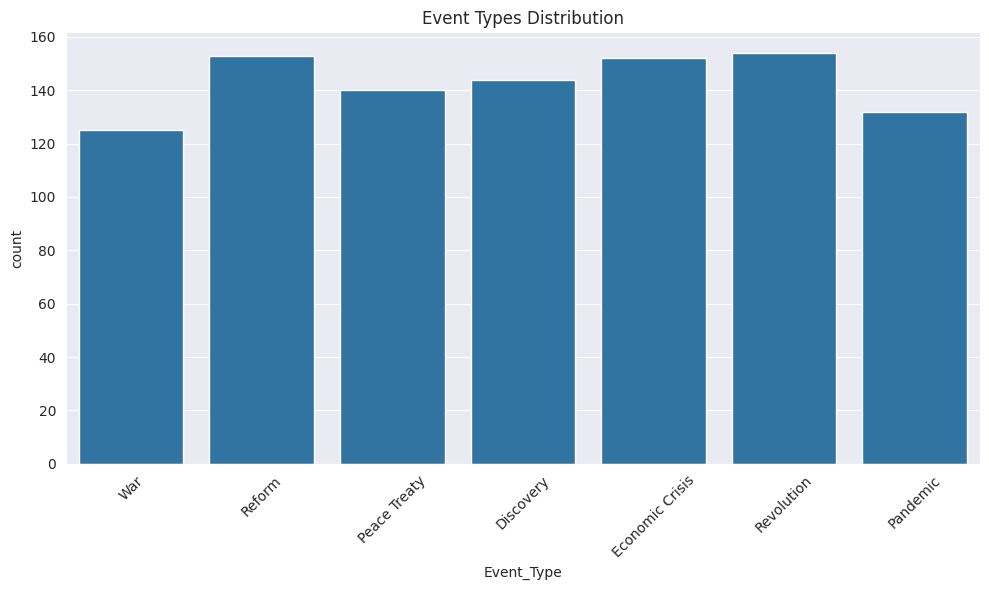

/tmp/ipykernel_6231/1026413498.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Decade', y='Casualties', data=df, estimator='sum', ci=None, hue='Impact_Level')


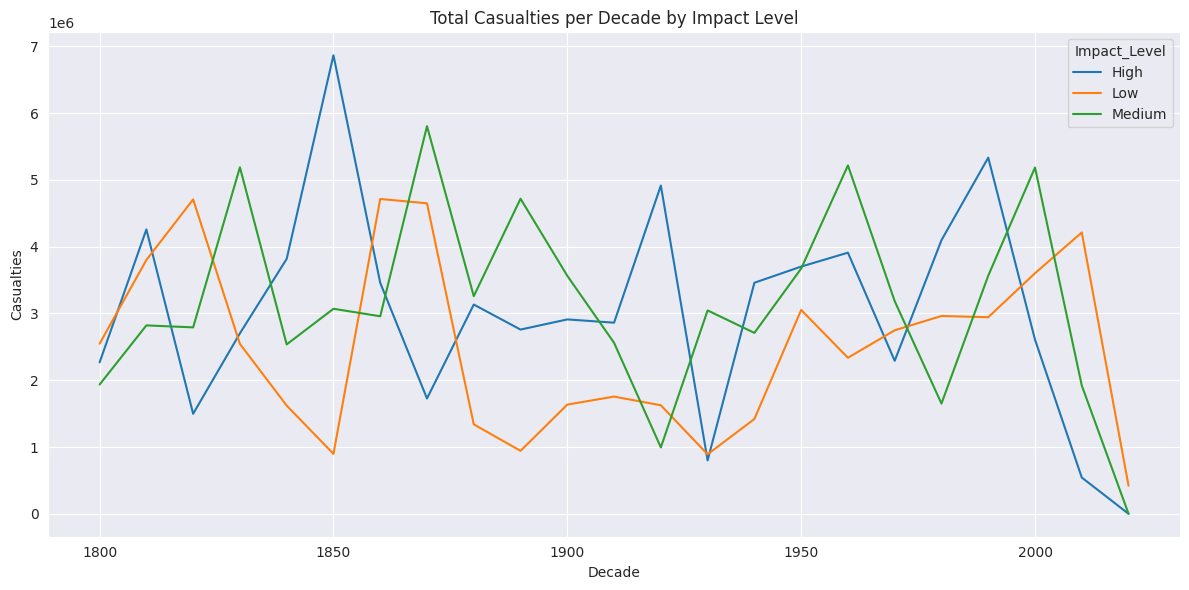

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Event_Type', data=df)
plt.title('Event Types Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Decade', y='Casualties', data=df, estimator='sum', ci=None, hue='Impact_Level')
plt.title('Total Casualties per Decade by Impact Level')
plt.tight_layout()
plt.show()

In [23]:
plt.show()
future_event = pd.DataFrame(columns=X_train.columns)
future_event.loc[0] = {
    'Year': 2070,
    'Casualties': 2,
    'Economic_Loss': 0,
    'Impact_Level_Code': 1,
    'Decade': 2070,
    'Region_Asia': 0,
    'Region_Europe': 0,
    'Region_Middle East': 1,
    'Region_North America': 0,
    'Region_Oceania': 0,
    'Region_South America': 0,
    'Region_Africa': 0
}
for col in X_train.columns:
    if col not in future_event.columns:
        future_event[col] = 0
future_event = future_event[X_train.columns]
prediction = model.predict(future_event)
print("\nPredicted Event Type for 2030 in Asia:", prediction[0])


Predicted Event Type for 2030 in Asia: Discovery
